# 1. Импортируем необходимые библиотеки #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format) # Я не очень силен в экспонентах, придадим числам более наглядный вид при выводе на экран.

# 2. Считываем данные из CSV-файлов в датафреймы Pandas #

In [2]:
train_df = pd.read_csv('SOURCE\\train.csv', sep=',')
questions_df = pd.read_csv('SOURCE\\questions.csv', sep=',')
lectures_df = pd.read_csv('SOURCE\\lectures.csv', sep=',')

# 3. Смотрим общую информацию по датафреймам #
На данный момент смотрим на типы данных и общий объем памяти, занимаемый каждым из датафреймов.

In [3]:
train_df.info()
print(f'\n')
questions_df.info()
print(f'\n')
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  in

**Вывод:** Типы данных не оптимизированы, есть пространство для преобразования типов данных и уменьшения объема датафреймов.

# 4. Оптимизируем объем данных, изменяем тип полей для числовых данных #

Прежде, чем объединять датафреймы, попробуем уменьшить их объем. Перейдем к анализу и преобразованию типов данных.

## 4.1. Анализируем числовые данные в датафрейме train_df ##

### 4.1.1. Анализируем типы данных ###

In [4]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,101230332.00,101230332.00,101230332.00,101230332.00,101230332.00,101230332.00,101230332.00,101230332.00,98878794.00
mean,50615165.50,7703643654.33,1076732424.20,5219.60,0.02,904.06,1.38,0.63,25423.81
std,29222679.86,11592655308.53,619716349.50,3866.36,0.14,1358.30,1.19,0.52,19948.15
min,0.00,0.00,115.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,25307582.75,524343559.00,540811564.00,2063.00,0.00,104.00,0.00,0.00,16000.00
50%,50615165.50,2674233764.50,1071781070.00,5026.00,0.00,382.00,1.00,1.00,21000.00
75%,75922748.25,9924550562.75,1615741676.00,7425.00,0.00,1094.00,3.00,1.00,29666.00
max,101230331.00,87425772049.00,2147482888.00,32736.00,1.00,9999.00,3.00,1.00,300000.00


**Выводы:** Поле user_id практически выходит по максимальному значению (2 147 482 888) за пределы диапазона int32 в Numpy (верхняя граница - 2 147 483 647). Тем не менее, на данной выборке есть возможность преобразования в int32. Поля row_id, prior_question_elapsed_time также преобразуем в int32.

Максимальное значение по полю content_id (32 736) попадает в пределы диапазона int16 в Numpy (верхняя граница - 32 767). Есть пространство для преобразования в int16. Поле task_container_id также преобразуем в int16.

Максимальное значение по полю user_answer (3) попадает в границы диапазона int8 в Numpy (верхняя граница - 127). Преобразуем в int8. Категорийные данные в полях content_type_id и answered_correctly также преобразуем в int8.

### 4.1.2. Выполняем преобразования ###

In [5]:
train_df['row_id'] = train_df['row_id'].astype(np.int32)
train_df['user_id'] = train_df['user_id'].astype(np.int32)
train_df['prior_question_elapsed_time'] = train_df['prior_question_elapsed_time'].fillna(-1) # По условию задачи, могут быть пустые значения. Заменяем на -1, чтобы не вызывать ошибку в следующей строке кода
train_df['prior_question_elapsed_time'] = train_df['prior_question_elapsed_time'].astype(np.int32)
train_df['content_id'] = train_df['content_id'].astype(np.int16)
train_df['task_container_id'] = train_df['task_container_id'].astype(np.int16)
train_df['user_answer'] = train_df['user_answer'].astype(np.int8)
train_df['content_type_id'] = train_df['content_type_id'].astype(np.int8)
train_df['answered_correctly'] = train_df['answered_correctly'].astype(np.int8)

### 4.1.3. Смотрим результат преобразований ###

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   row_id                          int32 
 1   timestamp                       int64 
 2   user_id                         int32 
 3   content_id                      int16 
 4   content_type_id                 int8  
 5   task_container_id               int16 
 6   user_answer                     int8  
 7   answered_correctly              int8  
 8   prior_question_elapsed_time     int32 
 9   prior_question_had_explanation  object
dtypes: int16(2), int32(3), int64(1), int8(3), object(1)
memory usage: 3.3+ GB


**Вывод:** Уменьшили объем датафрейма с 7.5 Гб до 3.3 Гб.

## 4.2. Анализируем числовые данные в датафрейме questions_df ##

### 4.2.1. Анализируем типы данных ###

In [7]:
questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00,13523.00,13523.00,13523.00
mean,6761.00,6760.51,1.46,4.26
std,3903.90,3903.86,1.15,1.65
min,0.00,0.00,0.00,1.00
25%,3380.50,3379.50,0.00,3.00
50%,6761.00,6761.00,1.00,5.00
75%,10141.50,10140.00,3.00,5.00
max,13522.00,13522.00,3.00,7.00


**Вывод:** Значения всех полей попадают в пределы диапазона int16 в Numpy (верхняя граница - 32 767). Есть пространство для преобразования в int16.

Для полей correct_answer и part подойдет тип int8 в Numpy (верхняя граница - 127).

### 4.2.2. Выполняем преобразования ###

In [8]:
questions_df['question_id'] = questions_df['question_id'].astype(np.int16)
questions_df['bundle_id'] = questions_df['bundle_id'].astype(np.int16)
questions_df['correct_answer'] = questions_df['correct_answer'].astype(np.int8)
questions_df['part'] = questions_df['part'].astype(np.int8)

### 4.2.3. Смотрим результат преобразований ###

In [9]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


**Вывод:** Уменьшили объем датафрейма с 528 до 185 Кб. Нам это в дальнейшем сократит размер при объединении датафреймов.

## 4.3. Анализируем числовые данные в датафрейме lectures_df ##

### 4.3.1. Анализируем типы данных ###

In [10]:
lectures_df.describe()

,lecture_id,tag,part
count,418.00,418.00,418.00
mean,16983.40,94.48,4.27
std,9426.16,53.59,1.87
min,89.00,0.00,1.00
25%,9026.25,50.25,2.00
50%,17161.50,94.50,5.00
75%,24906.25,140.00,6.00
max,32736.00,187.00,7.00


**Вывод:** Значения всех полей попадают в пределы диапазона int16 в Numpy (верхняя граница - 32 767). Есть пространство для преобразования в int16.

Для поля part подойдет тип int8 в Numpy (верхняя граница - 127).

### 4.3.2. Выполняем преобразования ###

In [11]:
lectures_df['lecture_id'] = lectures_df['lecture_id'].astype(np.int16)
lectures_df['tag'] = lectures_df['tag'].astype(np.int16)
lectures_df['part'] = lectures_df['part'].astype(np.int8)

### 4.3.3. Смотрим результат преобразований ###

In [12]:
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


**Вывод:** Уменьшили объем датафрейма с 13 до 5 Кб. Нам это в дальнейшем сократит размер при объединении датафреймов.

# 5. Объединяем датафреймы в единый #

## 5.1. Отделяем записи с вопросами и лекциями в train_df ##

In [13]:
questions_train_df = train_df[train_df['content_type_id'] == 0] # Вопросы
lectures_train_df = train_df[train_df['content_type_id'] == 1] # Лекции

## 5.2. Объединяем дополнительные датафреймы с основными данными ##

In [14]:
# Выполняем объединение датафрейма с вопросами
questions_merged = questions_train_df.merge(questions_df, left_on='content_id', right_on='question_id', how='left')

# Выполняем объединение датафрейма с лекциями
lectures_merged = lectures_train_df.merge(lectures_df, left_on='content_id', right_on='lecture_id', how='left')

## 5.3. Конкатенируем объединенные датафреймы обратно в train_df ##

In [15]:
train_df = pd.concat([questions_merged, lectures_merged], ignore_index=True)

## 5.4. Отбрасываем дубликаты полей из присоединенных датафреймов ##

In [16]:
train_df.drop(columns=['question_id', 'lecture_id'], inplace=True)

## 5.5. Дозаполняем числовые пропуски из присоединенных датафреймов, в связи с тем, что использовали left join ##

In [17]:
train_df['bundle_id'] = train_df['bundle_id'].fillna(-1)
train_df['bundle_id'] = train_df['bundle_id'].astype(np.int16) # Возвращаем целевой тип данных
train_df['tag'] = train_df['tag'].fillna(-1)
train_df['tag'] = train_df['tag'].astype(np.int16) # Возвращаем целевой тип данных
train_df['correct_answer'] = train_df['correct_answer'].fillna(-1)
train_df['correct_answer'] = train_df['correct_answer'].astype(np.int8) # Возвращаем целевой тип данных

## 6. Анализируем объединенный датафрейм ##

## 6.1.Смотрим описание датафрейма и выводим верхние 20 строк на экран ##

In [18]:
train_df.info() # Смотрим описание датафрейма
print(f'\n')
train_df.head(20) # Выводим верхние 20 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 16 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   row_id                          int32 
 1   timestamp                       int64 
 2   user_id                         int32 
 3   content_id                      int16 
 4   content_type_id                 int8  
 5   task_container_id               int16 
 6   user_answer                     int8  
 7   answered_correctly              int8  
 8   prior_question_elapsed_time     int32 
 9   prior_question_had_explanation  object
 10  bundle_id                       int16 
 11  correct_answer                  int8  
 12  part                            int8  
 13  tags                            object
 14  tag                             int16 
 15  type_of                         object
dtypes: int16(4), int32(3), int64(1), int8(5), object(3)
memory usage: 5.4+ GB




,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags,tag,type_of
0,0,0,115,5692,0,1,3,1,-1,NaN,5692,3,5,151,-1,NaN
1,1,56943,115,5716,0,2,2,1,37000,False,5716,2,5,168,-1,NaN
2,2,118363,115,128,0,0,0,1,55000,False,128,0,1,131 149 92,-1,NaN
3,3,131167,115,7860,0,3,0,1,19000,False,7860,0,1,131 104 81,-1,NaN
4,4,137965,115,7922,0,4,1,1,11000,False,7922,1,1,131 149 92,-1,NaN
5,5,157063,115,156,0,5,2,1,5000,False,156,2,1,131 101 162 38,-1,NaN
6,6,176092,115,51,0,6,0,1,17000,False,51,0,1,131 187 81,-1,NaN
7,7,194190,115,50,0,7,3,1,17000,False,50,3,1,131 101 38,-1,NaN
8,8,212463,115,7896,0,8,2,1,16000,False,7896,2,1,131 104 162 81,-1,NaN
9,9,230983,115,7863,0,9,0,1,16000,False,7863,0,1,131 68 92,-1,NaN


## 6.2. Анализируем наличие пустых значений в объединенном датафрейме ##

In [19]:
train_df.isna().sum()

row_id                                   0
timestamp                                0
user_id                                  0
content_id                               0
content_type_id                          0
task_container_id                        0
user_answer                              0
answered_correctly                       0
prior_question_elapsed_time              0
prior_question_had_explanation      392506
bundle_id                                0
correct_answer                           0
part                                     0
tags                               1959033
tag                                      0
type_of                           99271300
dtype: int64

# 7. Визуализируем данные #

## 7.1. Анализируем распределение переменных ##

### 7.1.1. Анализируем распределение числовых переменных ###

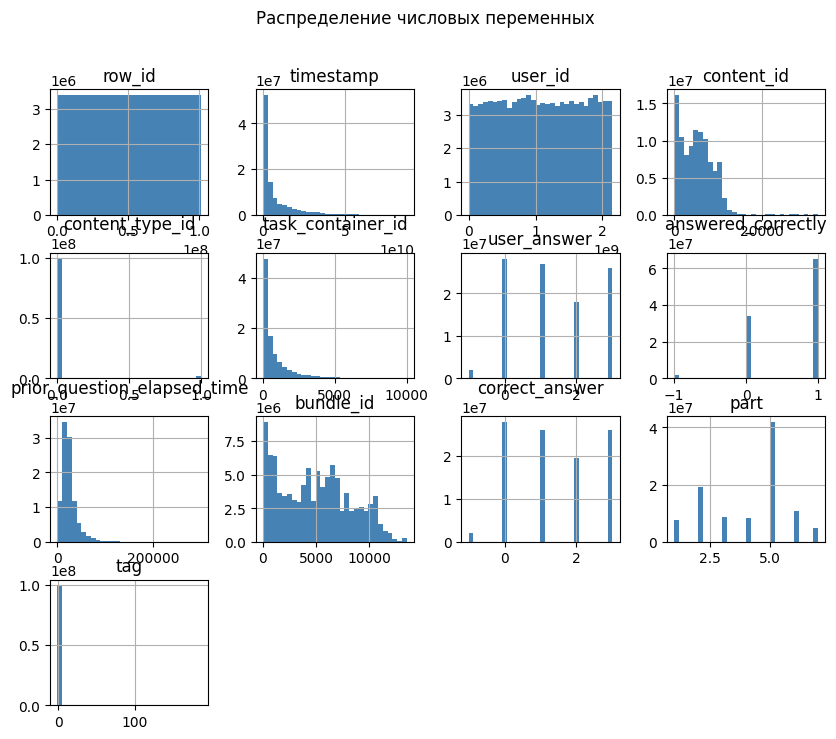

In [20]:
train_df.hist(bins=30, figsize=(10, 8), color='steelblue')
plt.suptitle('Распределение числовых переменных')
plt.show()

**Вывод:** Поля row_id и user_id здесь не репрезентативны, т.к. их назначение носит технический характер хранения идентификаторов.

### 7.1.2. Анализируем распределение категориальных переменных ###

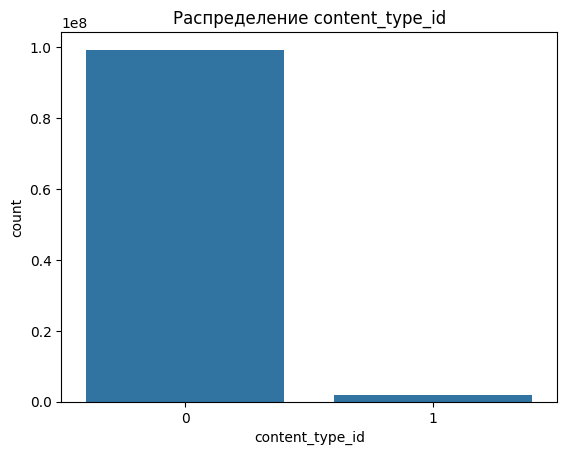

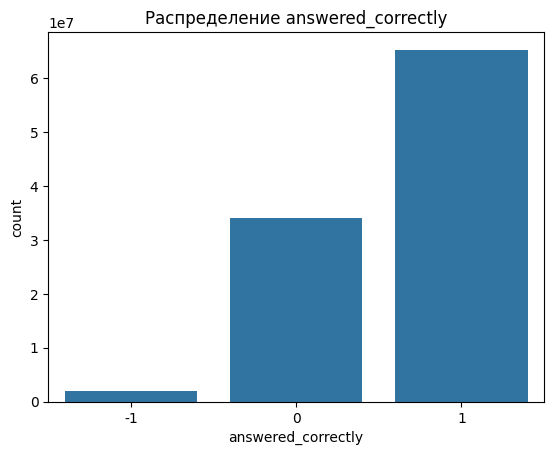

In [21]:
for column in ['content_type_id', 'answered_correctly']:
    sns.countplot(x=column, data=train_df)
    plt.title(f'Распределение {column}')
    plt.show()

## 7.2 Анализируем выбросы по числовым полям, которые нас могут заинтересовать ##

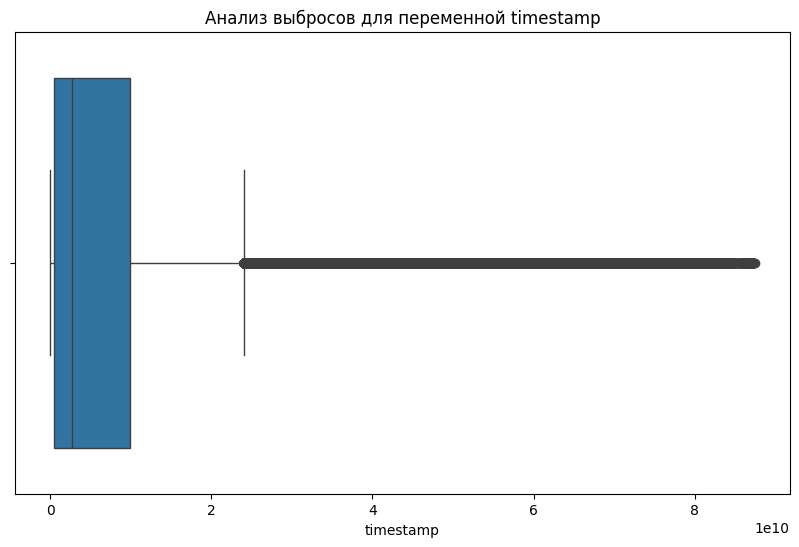

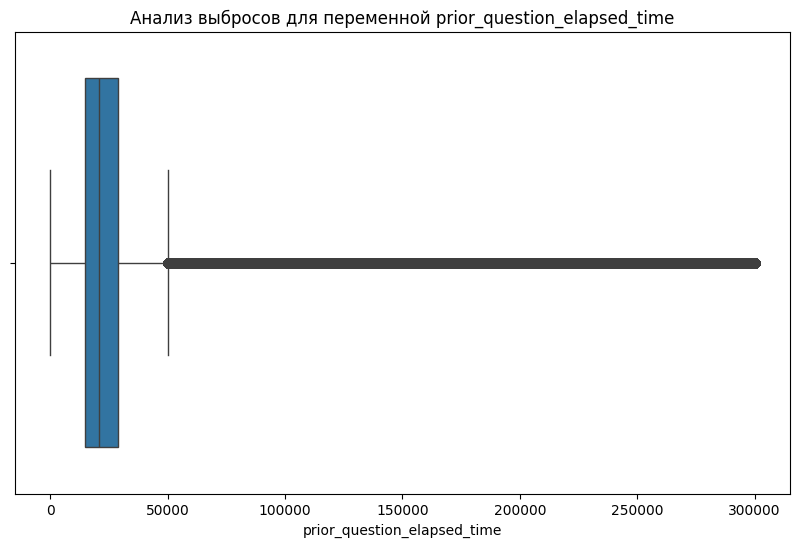

In [23]:
columns = ['timestamp', 'prior_question_elapsed_time']

for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=train_df[column], orient='h')
        plt.title(f'Анализ выбросов для переменной {column}')
        plt.show()

## 7.3. Анализируем корреляции по числовым полям ##

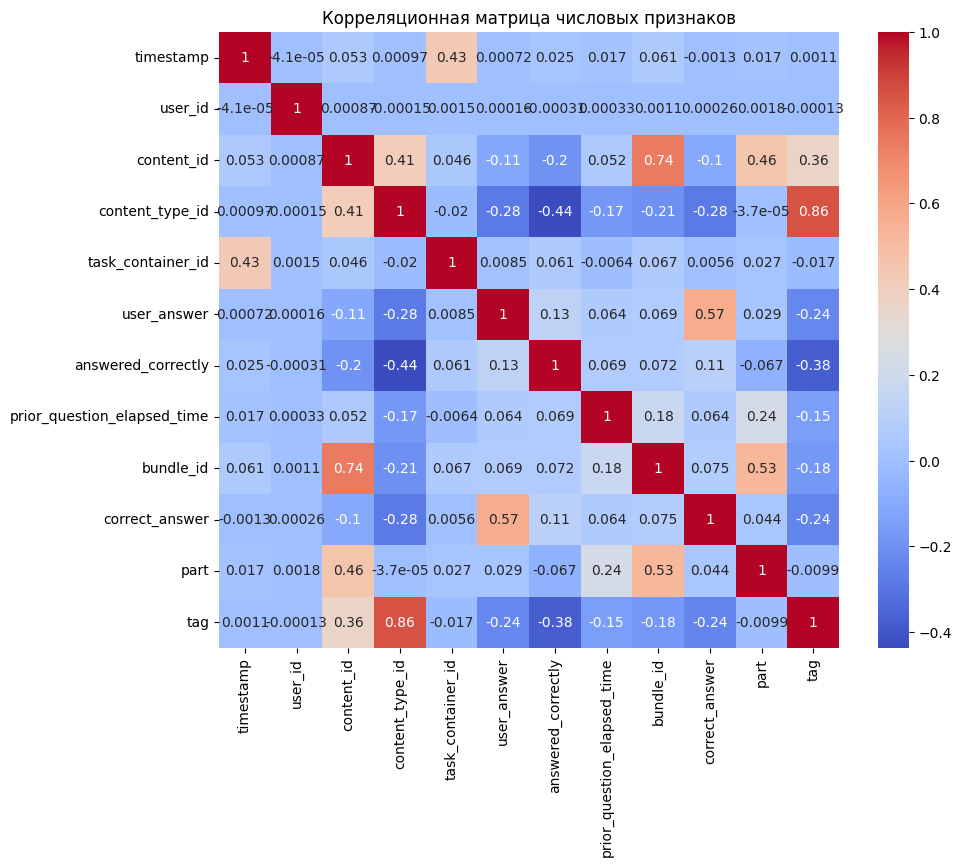

In [26]:
numeric_columns = train_df.drop(columns=['row_id']).select_dtypes(include=['int8', 'int16', 'int32', 'int64']) # Исключаем идентификаторы записей методом drop()
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# 8. Выводы #

- Наблюдается высокая колинеарность между признаками content_type_id и tag (86%);
- Наблюдается высокая колинеарность между признаками content_id и bundle_id (74%);
- Существуют определенные выбросы в числовых признаках, которые лучше не учитывать в прогнозируемой модели;
- Пропущенные значения рекомендуется заменить на -1 в случае категорий, либо заменить на медианное значение там, где это возможно.